# 茨城県の人口推移と土地価格の推移



・人口総数のマップをプロット（22年分）
・土地価格（地価価格）マップをプロット（22年分）

それぞれのマップをアニメーション化、22年間でどのような変化があるか可視化する。

また、人口総数と地価価格の相関はあるかどうか見る。



In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
# データを変数に入れる
ibaraki = gpd.read_file('ibaraki.geojson')

<Axes: >

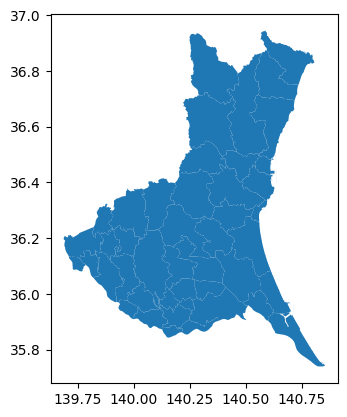

In [3]:
ibaraki.plot()

In [4]:
ibaraki

,N03_001,N03_002,N03_003,N03_004,N03_005,N03_007,geometry
0,茨城県,None,None,水戸市,None,08201,"POLYGON ((140.50173 36.30390, 140.50216 36.303..."
1,茨城県,None,None,日立市,None,08202,"POLYGON ((140.62736 36.48348, 140.62697 36.483..."
2,茨城県,None,None,日立市,None,08202,"POLYGON ((140.63352 36.48167, 140.63349 36.481..."
3,茨城県,None,None,日立市,None,08202,"POLYGON ((140.63684 36.48263, 140.63683 36.479..."
4,茨城県,None,None,日立市,None,08202,"POLYGON ((140.63091 36.49787, 140.63081 36.498..."
...,...,...,...,...,...,...,...
215,茨城県,None,猿島郡,五霞町,None,08542,"POLYGON ((139.77252 36.08333, 139.77252 36.083..."
216,茨城県,None,猿島郡,境町,None,08546,"POLYGON ((139.81903 36.05802, 139.82017 36.057..."
217,茨城県,None,猿島郡,境町,None,08546,"POLYGON ((139.84043 36.08864, 139.84028 36.088..."
218,茨城県,None,猿島郡,境町,None,08546,"POLYGON ((139.84335 36.09704, 139.84319 36.097..."


In [5]:
# rename
ibaraki.rename(columns={'N03_007':'KEY_CODE'},inplace=True)

In [6]:
print(ibaraki['KEY_CODE'])

0      08201
1      08202
2      08202
3      08202
4      08202
       ...  
215    08542
216    08546
217    08546
218    08546
219    08564
Name: KEY_CODE, Length: 220, dtype: object


In [7]:
print(ibaraki['KEY_CODE'].to_list())

['08201', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08203', '08204', '08205', '08207', '08208', '08208', '08210', '08210', '08211', '08212', '08214', '08214', '08214', '08214', '08214', '08214', '08214', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08216', '08217', '08219', '08220', '08221', '08221', '08221', '08221', '08222', '08222', '08222', '08223', '08224', '08225', '08226', '08227', '08228', '08228', '08228', '08229', '08230', '08231', '08232', '08232', '08232', '08232', '08232', '08233', '08234', '08235', '08236', '08302', '08309', '08309', '08309', '08309', 

In [8]:
unique_ibaraki = ibaraki[['KEY_CODE', 'N03_004']].drop_duplicates()

In [9]:
print(unique_ibaraki)

    KEY_CODE  N03_004
0      08201      水戸市
1      08202      日立市
33     08203      土浦市
34     08204      古河市
35     08205      石岡市
36     08207      結城市
37     08208     龍ケ崎市
39     08210      下妻市
41     08211      常総市
42     08212    常陸太田市
43     08214      高萩市
50     08215     北茨城市
75     08216      笠間市
76     08217      取手市
77     08219      牛久市
78     08220     つくば市
79     08221   ひたちなか市
83     08222      鹿嶋市
86     08223      潮来市
87     08224      守谷市
88     08225    常陸大宮市
89     08226      那珂市
90     08227      筑西市
91     08228      坂東市
94     08229      稲敷市
95     08230  かすみがうら市
96     08231      桜川市
97     08232      神栖市
102    08233      行方市
103    08234      鉾田市
104    08235  つくばみらい市
105    08236     小美玉市
106    08302      茨城町
107    08309      大洗町
206    08310      城里町
207    08341      東海村
210    08364      大子町
211    08442      美浦村
212    08443      阿見町
213    08447      河内町
214    08521     八千代町
215    08542      五霞町
216    08546       境町
219    08564      利根町


In [10]:

# CSVファイルとして保存 (UTF-8エンコーディング)
file_path = r'C:\Users\sui7z\OneDrive\python\unique_ibaraki.csv'
unique_ibaraki.to_csv(file_path, index=False, encoding='utf-8')

In [11]:
# CSVファイルとして保存 (Shift_JISエンコーディング)
file_path = r'C:\Users\sui7z\OneDrive\python\unique_ibaraki.csv'
unique_ibaraki.to_csv(file_path, index=False, encoding='shift_jis')

In [12]:
ibaraki_chika = pd.read_csv('finalchika.csv')

In [13]:
ibaraki_chika

,KEY_CODE,市区町村,地価平均,年度,人口
0,8201,水戸市,113888,2002年,262949
1,8201,水戸市,101556,2003年,263845
2,8201,水戸市,89555,2004年,264136
3,8201,水戸市,81710,2005年,262603
4,8201,水戸市,76908,2006年,263267
...,...,...,...,...,...
963,8564,利根町,15278,2019年,15403
964,8564,利根町,15158,2020年,15340
965,8564,利根町,14962,2021年,15181
966,8564,利根町,14768,2022年,14966


In [14]:
ibaraki_chika.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968 entries, 0 to 967
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   KEY_CODE  968 non-null    int64 
 1   市区町村      968 non-null    object
 2   地価平均      968 non-null    int64 
 3   年度        968 non-null    object
 4   人口        968 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 37.9+ KB


In [15]:
ibaraki

,N03_001,N03_002,N03_003,N03_004,N03_005,KEY_CODE,geometry
0,茨城県,None,None,水戸市,None,08201,"POLYGON ((140.50173 36.30390, 140.50216 36.303..."
1,茨城県,None,None,日立市,None,08202,"POLYGON ((140.62736 36.48348, 140.62697 36.483..."
2,茨城県,None,None,日立市,None,08202,"POLYGON ((140.63352 36.48167, 140.63349 36.481..."
3,茨城県,None,None,日立市,None,08202,"POLYGON ((140.63684 36.48263, 140.63683 36.479..."
4,茨城県,None,None,日立市,None,08202,"POLYGON ((140.63091 36.49787, 140.63081 36.498..."
...,...,...,...,...,...,...,...
215,茨城県,None,猿島郡,五霞町,None,08542,"POLYGON ((139.77252 36.08333, 139.77252 36.083..."
216,茨城県,None,猿島郡,境町,None,08546,"POLYGON ((139.81903 36.05802, 139.82017 36.057..."
217,茨城県,None,猿島郡,境町,None,08546,"POLYGON ((139.84043 36.08864, 139.84028 36.088..."
218,茨城県,None,猿島郡,境町,None,08546,"POLYGON ((139.84335 36.09704, 139.84319 36.097..."


In [16]:
ibaraki.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   N03_001   220 non-null    object  
 1   N03_002   0 non-null      object  
 2   N03_003   114 non-null    object  
 3   N03_004   220 non-null    object  
 4   N03_005   0 non-null      object  
 5   KEY_CODE  220 non-null    object  
 6   geometry  220 non-null    geometry
dtypes: geometry(1), object(6)
memory usage: 12.2+ KB


In [17]:
# OBJECTからintに変える
ibaraki['KEY_CODE'] = ibaraki['KEY_CODE'].astype(int)

In [18]:
ibaraki_chika.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968 entries, 0 to 967
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   KEY_CODE  968 non-null    int64 
 1   市区町村      968 non-null    object
 2   地価平均      968 non-null    int64 
 3   年度        968 non-null    object
 4   人口        968 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 37.9+ KB


In [19]:
# ここでようやく merge コマンドで統合させて、新しい変数に入れる
ibaraki_chikapop = ibaraki_chika.merge(ibaraki,on='KEY_CODE')

In [20]:
ibaraki_chikapop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4840 entries, 0 to 4839
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   KEY_CODE  4840 non-null   int64   
 1   市区町村      4840 non-null   object  
 2   地価平均      4840 non-null   int64   
 3   年度        4840 non-null   object  
 4   人口        4840 non-null   int64   
 5   N03_001   4840 non-null   object  
 6   N03_002   0 non-null      object  
 7   N03_003   2508 non-null   object  
 8   N03_004   4840 non-null   object  
 9   N03_005   0 non-null      object  
 10  geometry  4840 non-null   geometry
dtypes: geometry(1), int64(3), object(7)
memory usage: 416.1+ KB


In [21]:
ibaraki_chikapop

,KEY_CODE,市区町村,地価平均,年度,人口,N03_001,N03_002,N03_003,N03_004,N03_005,geometry
0,8201,水戸市,113888,2002年,262949,茨城県,None,None,水戸市,None,"POLYGON ((140.50173 36.30390, 140.50216 36.303..."
1,8201,水戸市,101556,2003年,263845,茨城県,None,None,水戸市,None,"POLYGON ((140.50173 36.30390, 140.50216 36.303..."
2,8201,水戸市,89555,2004年,264136,茨城県,None,None,水戸市,None,"POLYGON ((140.50173 36.30390, 140.50216 36.303..."
3,8201,水戸市,81710,2005年,262603,茨城県,None,None,水戸市,None,"POLYGON ((140.50173 36.30390, 140.50216 36.303..."
4,8201,水戸市,76908,2006年,263267,茨城県,None,None,水戸市,None,"POLYGON ((140.50173 36.30390, 140.50216 36.303..."
...,...,...,...,...,...,...,...,...,...,...,...
4835,8564,利根町,15278,2019年,15403,茨城県,None,北相馬郡,利根町,None,"POLYGON ((140.12738 35.88210, 140.12713 35.881..."
4836,8564,利根町,15158,2020年,15340,茨城県,None,北相馬郡,利根町,None,"POLYGON ((140.12738 35.88210, 140.12713 35.881..."
4837,8564,利根町,14962,2021年,15181,茨城県,None,北相馬郡,利根町,None,"POLYGON ((140.12738 35.88210, 140.12713 35.881..."
4838,8564,利根町,14768,2022年,14966,茨城県,None,北相馬郡,利根町,None,"POLYGON ((140.12738 35.88210, 140.12713 35.881..."


In [22]:
# '年度'列に平成14年の行だけを抽出
df_2002 = ibaraki_chikapop[ibaraki_chikapop['年度'] == '2002年']

# 結果を表示
print(df_2002)


      KEY_CODE 市区町村    地価平均     年度      人口 N03_001 N03_002 N03_003 N03_004  \
0         8201  水戸市  113888  2002年  262949     茨城県    None    None     水戸市   
22        8202  日立市   75152  2002年  204679     茨城県    None    None     日立市   
23        8202  日立市   75152  2002年  204679     茨城県    None    None     日立市   
24        8202  日立市   75152  2002年  204679     茨城県    None    None     日立市   
25        8202  日立市   75152  2002年  204679     茨城県    None    None     日立市   
...        ...  ...     ...    ...     ...     ...     ...     ...     ...   
4730      8542  五霞町   42425  2002年   10180     茨城県    None     猿島郡     五霞町   
4752      8546   境町   41100  2002年   27080     茨城県    None     猿島郡      境町   
4753      8546   境町   41100  2002年   27080     茨城県    None     猿島郡      境町   
4754      8546   境町   41100  2002年   27080     茨城県    None     猿島郡      境町   
4818      8564  利根町   47790  2002年   18649     茨城県    None    北相馬郡     利根町   

     N03_005                                           geometry

In [23]:
df_2002.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 0 to 4818
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   KEY_CODE  220 non-null    int64   
 1   市区町村      220 non-null    object  
 2   地価平均      220 non-null    int64   
 3   年度        220 non-null    object  
 4   人口        220 non-null    int64   
 5   N03_001   220 non-null    object  
 6   N03_002   0 non-null      object  
 7   N03_003   114 non-null    object  
 8   N03_004   220 non-null    object  
 9   N03_005   0 non-null      object  
 10  geometry  220 non-null    geometry
dtypes: geometry(1), int64(3), object(7)
memory usage: 20.6+ KB


In [24]:
df_2002

,KEY_CODE,市区町村,地価平均,年度,人口,N03_001,N03_002,N03_003,N03_004,N03_005,geometry
0,8201,水戸市,113888,2002年,262949,茨城県,None,None,水戸市,None,"POLYGON ((140.50173 36.30390, 140.50216 36.303..."
22,8202,日立市,75152,2002年,204679,茨城県,None,None,日立市,None,"POLYGON ((140.62736 36.48348, 140.62697 36.483..."
23,8202,日立市,75152,2002年,204679,茨城県,None,None,日立市,None,"POLYGON ((140.63352 36.48167, 140.63349 36.481..."
24,8202,日立市,75152,2002年,204679,茨城県,None,None,日立市,None,"POLYGON ((140.63684 36.48263, 140.63683 36.479..."
25,8202,日立市,75152,2002年,204679,茨城県,None,None,日立市,None,"POLYGON ((140.63091 36.49787, 140.63081 36.498..."
...,...,...,...,...,...,...,...,...,...,...,...
4730,8542,五霞町,42425,2002年,10180,茨城県,None,猿島郡,五霞町,None,"POLYGON ((139.77252 36.08333, 139.77252 36.083..."
4752,8546,境町,41100,2002年,27080,茨城県,None,猿島郡,境町,None,"POLYGON ((139.81903 36.05802, 139.82017 36.057..."
4753,8546,境町,41100,2002年,27080,茨城県,None,猿島郡,境町,None,"POLYGON ((139.84043 36.08864, 139.84028 36.088..."
4754,8546,境町,41100,2002年,27080,茨城県,None,猿島郡,境町,None,"POLYGON ((139.84335 36.09704, 139.84319 36.097..."


In [25]:
# CSVファイルとして保存 (Shift_JISエンコーディング)
file_path = r'C:\Users\sui7z\OneDrive\python\df_2002.csv'
df_2002.to_csv(file_path, index=False, encoding='shift_jis')

In [26]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


In [27]:
# ibarakiデータフレームをエクセル形式で保存
ibaraki.to_excel("ibaraki.xlsx", index=False)

AttributeError: 'Series' object has no attribute 'centroid'

c:\Users\sui7z\miniconda3\envs\gis\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 22320 (\N{CJK UNIFIED IDEOGRAPH-5730}) missing from current font.
  func(*args, **kwargs)
c:\Users\sui7z\miniconda3\envs\gis\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 20385 (\N{CJK UNIFIED IDEOGRAPH-4FA1}) missing from current font.
  func(*args, **kwargs)
c:\Users\sui7z\miniconda3\envs\gis\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  func(*args, **kwargs)
c:\Users\sui7z\miniconda3\envs\gis\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from current font.
  func(*args, **kwargs)
c:\Users\sui7z\miniconda3\envs\gis\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  func(*args, **kwargs)
c:\Users\sui7z\miniconda3\envs\gis\Lib\site-packages\IP

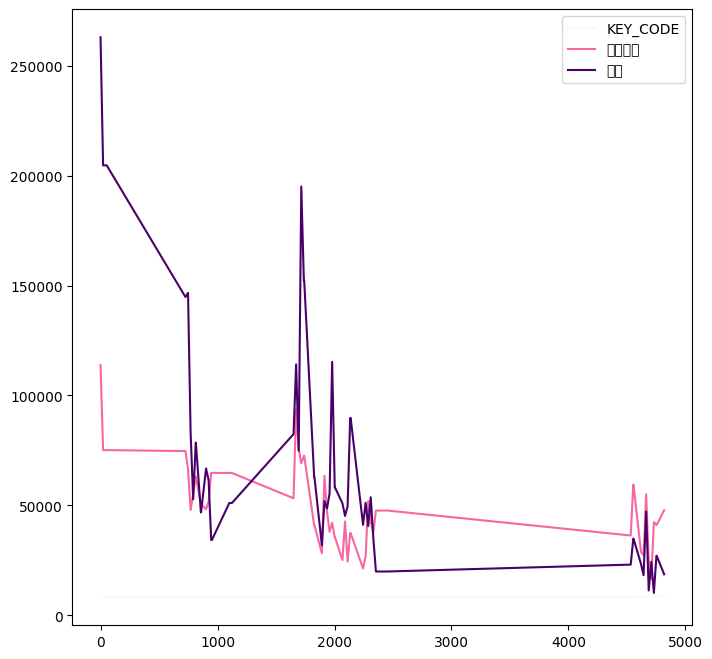

In [33]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 日本語フォントの設定（例: WindowsのMS Gothic）
fp = FontProperties(fname='C:\\Windows\\Fonts\\msgothic.ttc', size=8)  # WindowsのMS Gothic
# fp = FontProperties(fname='/System/Library/Fonts/ヒラギノ角ゴシック W6.ttc', size=8)  # macOSの例
# fp = FontProperties(fname='/usr/share/fonts/truetype/noto/NotoSansCJK-Regular.ttc', size=8)  # Linuxの例

# 地図のプロット
fig, ax = plt.subplots(1, 1, figsize=(8, 8))  # サイズを適度に設定
df_2002.plot(column='人口', ax=ax, legend=True, cmap='RdPu')

# 市区町村名の表示
# Centroidの計算
df_2002['centroid'] = df_2002.geometry.centroid

# 一意の市区町村名とその位置を取得
unique_labels = df_2002.drop_duplicates(subset=['市区町村'])

# テキストの追加
for idx, row in unique_labels.iterrows():
    # Centroidを直接使用せず、Pointオブジェクトを使用してx, y座標を取得
    centroid = row['centroid']
    ax.text(centroid.x, centroid.y, row['市区町村'], fontsize=8, ha='center', fontproperties=fp)

plt.title('茨城県の2002年市区町村別人口総数', fontproperties=fp)
plt.show()
